# Hunn Size Factor Analyses

In these analyses, we will focus on Zapotec naming data from Hunn, and environmental bird statistics in Oaxaca, Mexico from eBird.

Here we re-explore Hunn's analysis of how size affects the perceptual salience for folk biological classification, following the chapter

Hunn, E. (1999). Size as limiting the recognition of biodiversity in folkbiological classifications: One of four factors governing the cultural recognition of biological taxa. In *Folkbiology*, edited by D. L. Medin and S. Atran, pp. 47–70. MIT Press, Cambridge, MA.

In sum, he "demonstrates a positive correlation between the Scientific Species Recognition Ration (SSRR) as an index of the total salience of a set of organisms, and the average size of those organisms."

## Import statements and useful functions

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import linregress

/Users/josh/miniconda2/envs/py3test/lib/python3.6/site-packages/scipy/__init__.py:115: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.12.1)
  UserWarning)


In [57]:
def get_birdcounts(ebd_data):
	# read ebird count and name data
	bird_counts = {}

	science_name = list(ebd_data['SCIENTIFIC NAME'])

	i=0
	for bird_name in science_name:
		if bird_name in bird_counts.keys():
			bird_counts[bird_name] +=1
		else:
			bird_counts[bird_name] = 1

		i+=1

	return bird_counts

def map_com2sci(ebd_data):
	# read ebird count and name data
	bird_sci2com_names = {}
	bird_com2sci_names = {}

	common_name = list(ebd_data['COMMON NAME'])
	science_name = list(ebd_data['SCIENTIFIC NAME'])

	i=0
	for bird_name in science_name:
		bird_sci2com_names[bird_name] = common_name[i]
		bird_com2sci_names[common_name[i]] = bird_name
		i+=1

	return bird_sci2com_names, bird_com2sci_names

def get_clements_group(clementstax_data):
	clements_group = {}
	clements_sciname = list(clementstax_data['scientific name'])
	clements_species_group = list(clementstax_data['eBird species group'])

	i=0
	for bird_name in clements_sciname:
		clements_group[bird_name] = clements_species_group[i]
		i+=1

	return clements_group

def get_birdsizes(zapotec_data):

	bird_sizes = {}

	bird_masses = list(zapotec_data['mass'])
	science_name = list(zapotec_data['species'])

	i=0
	for bird_name in science_name:
		bird_sizes[bird_name] = bird_masses[i]
		i+=1

	return bird_sizes

def get_basiclevel(zapotec_data):
	bird_sci2basic_names = {}

	basic_name = list(zapotec_data['folk_generic'])
	science_name = list(zapotec_data['species'])

	i=0
	for bird_name in science_name:
		bird_sci2basic_names[bird_name] = basic_name[i]
		i+=1

	return bird_sci2basic_names


def get_terminallevel(zapotec_data):
	bird_sci2terminal_names = {}

	terminal_name = list(zapotec_data['folk_specific'])
	science_name = list(zapotec_data['species'])

	i=0
	for bird_name in science_name:
		if bird_name in bird_sci2terminal_names.keys():
			bird_sci2terminal_names[bird_name].append(terminal_name[i])
		else:
			bird_sci2terminal_names[bird_name] = []
			bird_sci2terminal_names[bird_name].append(terminal_name[i])
		i+=1

	return bird_sci2terminal_names

## Procedure

 "First, have as data a comprehensive list of the species known to occur in the  range of the culture in question." 

In [58]:
# load ebird data
ebd_data = pd.read_csv('./data/ebird_MX-OAX_cogsci_clean.csv')
ebd_data.head()
# get bird counts, index by species name
bird_counts = get_birdcounts(ebd_data)

"Next, we need a list for a given cultural group of all the basic level folk biological categories recognized nomenclaturally by that group." 

In [62]:
zapotec_data = pd.read_csv('./data/df_zapotec.csv')
zapotec_data

,species,length,mass,freq,folk_generic,folk_specific,clements_group,prototype
0,Catherpes mexicanus,5.000,11.97,2327,nguzhǐn,nguzhǐn-zhàn̲-quiè,Wrens,0
1,Cynanthus sordidus,3.750,4.00,4751,dzǐn̲g,dzǐn̲g,Hummingbirds,0
2,Buteo brachyurus,16.000,496.01,1314,msì,msì,"Vultures, Hawks, and Allies",0
3,Accipiter cooperii,17.500,429.67,1551,msì,msì-lâg,"Vultures, Hawks, and Allies",0
4,Caracara plancus,49.500,1078.62,0,mguîn̲-rlæ̌-dzìt,mguîn̲-rlæ̌-dzìt,Falcons and Caracaras,0
5,Buteo jamaicensis,22.000,1101.16,2978,msì,msì,"Vultures, Hawks, and Allies",1
6,Cypseloides rutilus,6.250,20.20,0,xlútsǐ,xlútsǐ-ngǎs,Swifts,0
7,Coragyps atratus,25.000,1881.69,8865,pěch,pěch-rúx,"Vultures, Hawks, and Allies",0
8,Turdus migratorius,10.000,78.50,1542,miân,miân,Thrushes,0
9,Pooecetes gramineus,6.125,25.68,198,wǐt,wǐt,New World Sparrows,0


In [60]:
# # load zapotec naming data
# zapotec_data = pd.read_csv("./data/zapotec_bird_naming_table.csv",skipinitialspace=True)
# zapotec_data.head()

,LANGUAGE NAME,SCIENTIFIC NAME,BASIC LEVEL
0,gàrs,Bubulcus ibis,gàrs
1,gàrs-nquǐts,Bubulcus ibis,gàrs
2,pìxîx,Dendrocygna autumnalis,pìxîx
3,gâns,Anser anser,gâns
4,gâns,Anser cygnoides,gâns


In [63]:
# get mapping of scientific species to basic level name
basic_levels = get_basiclevel(zapotec_data)
basic_level_names = list(set(zapotec_data['folk_generic']))
terminal_names = get_terminallevel(zapotec_data)

In [64]:
# get average bird mass, index by species name
bird_sizes = get_birdsizes(zapotec_data)

In [65]:
# this is a list of birds we found sizes for but that the species name is not recognized in Clements taxonomy/eBird
notseen_list = list(set(bird_sizes.keys()) - set(bird_counts.keys()))
# this is the main list of bird species to consider (birds with a frequency > 0)
bird_list = list(set(bird_sizes.keys()).intersection(set(bird_counts.keys())))  


In [93]:
# whos

### quick aside
Let's look at the distribution of bird sizes vs. bird frequencies

slope: -0.151650    intercept: 7.664682
R-squared: 0.036119


Text(0, 0.5, 'log bird freqs')

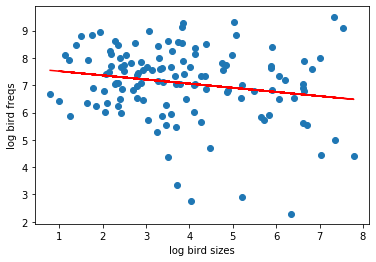

In [95]:
# plot just the distribution of bird sizes by bird freqs
xs = []
ys = []
for bird_name in bird_list:
    xs.append(bird_sizes[bird_name])
    ys.append(bird_counts[bird_name])
    
slope, intercept, r_value, p_value, std_err = linregress(np.log(xs), np.log(ys))
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

    
plt.scatter(np.log(xs),np.log(ys))
plt.plot(np.log(xs),intercept+slope*np.log(xs),'r')
plt.xlabel('log bird sizes')
plt.ylabel('log bird freqs')

## Back to the procedure
"The next step is to match the size measures with some measure of the degree to which the organisms are recognized taxonomically in the folk classification." 



## Refined analysis of size factor
Define a sampling unit -- here we use the Clements taxonomic species group (provided by eBird)

In [96]:
# load clements taxonomy data
clementstax_data = pd.read_csv("./data/clementstaxonomy.csv")
# get clements groups, index by species name
clements_groups = get_clements_group(clementstax_data)


### Procedure
First calculate the mean value of the sizes of the species of each sampling unit. Then, calculate the scientific species recognition ratio (SSRR) of each sampling unit. This is simply the number of basic level folk taxa used to classify the species of the sampling unit, divided by the number of scientific species in that sampling unit.

In [97]:
# for each clements group, find the list of n unique species, and their respective list of m basic level names. SSRR = m/n.
# For each species in zapotec, find its clements group
group_members = {}
group_members_basics = {}
group_members_terminals = {}
group_members_freqs = {}
group_members_sizes = {}
for bird_name in bird_list:
	
	# find clements group
	cur_group = clements_groups[bird_name]
	if cur_group in group_members.keys():
		group_members[cur_group].append(bird_name)
		group_members_basics[cur_group].append(basic_levels[bird_name])
		group_members_freqs[cur_group].append(bird_counts[bird_name])
		group_members_sizes[cur_group].append(bird_sizes[bird_name])
		for i in terminal_names[bird_name]:
			group_members_terminals[cur_group].append(i)
	else:
		group_members[cur_group] = []
		group_members[cur_group].append(bird_name)
		group_members_basics[cur_group] = []
		group_members_basics[cur_group].append(basic_levels[bird_name])
		group_members_freqs[cur_group] = []
		group_members_freqs[cur_group].append(bird_counts[bird_name])
		group_members_sizes[cur_group] = []
		group_members_sizes[cur_group].append(bird_sizes[bird_name])
		group_members_terminals[cur_group] = []
		for i in terminal_names[bird_name]:
			group_members_terminals[cur_group].append(i)
            
# only use groups with more than one member in them
goodgroups = []
for cur_group in group_members:
    if len(group_members[cur_group]) > 1:
        goodgroups.append(cur_group)

## Basic-level taxon units

In [98]:
SSRR = {}
xs = []
ys = []
zs = []
ns = []
# for sampling_unit in group_members:
for sampling_unit in goodgroups:
    numer = len(set(group_members_basics[sampling_unit]))
    denom = len(group_members[sampling_unit])
    SSRR[sampling_unit] = numer/denom
    ys.append(SSRR[sampling_unit])
    xs.append(np.mean(group_members_sizes[sampling_unit]))
    zs.append(np.mean(group_members_freqs[sampling_unit]))
    ns.append(len(group_members[sampling_unit]))
    print("log size: {0:.2f}".format(np.log(np.mean(group_members_sizes[sampling_unit])))+", ssrr: {0:.2f}".format(SSRR[sampling_unit])+", samp unit: "+sampling_unit+", n: "+str(len(group_members[sampling_unit])))
    

log size: 3.19, ssrr: 0.42, samp unit: Tyrant Flycatchers: Pewees, Kingbirds, and Allies, n: 12
log size: 1.60, ssrr: 0.08, samp unit: Hummingbirds, n: 13
log size: 5.73, ssrr: 1.00, samp unit: Grouse, Quail, and Allies, n: 2
log size: 2.21, ssrr: 0.62, samp unit: Wood-Warblers, n: 8
log size: 3.45, ssrr: 0.78, samp unit: New World Sparrows, n: 9
log size: 2.33, ssrr: 0.50, samp unit: Tits, Chickadees, and Titmice, n: 2
log size: 3.58, ssrr: 0.50, samp unit: Swifts, n: 2
log size: 4.83, ssrr: 0.33, samp unit: Woodpeckers, n: 6
log size: 5.16, ssrr: 0.71, samp unit: Pigeons and Doves, n: 7
log size: 6.76, ssrr: 0.29, samp unit: Waterfowl, n: 7
log size: 4.15, ssrr: 0.67, samp unit: Catbirds, Mockingbirds, and Thrashers, n: 3
log size: 4.26, ssrr: 1.00, samp unit: Trogons and Quetzals, n: 2
log size: 6.08, ssrr: 1.00, samp unit: Falcons and Caracaras, n: 2
log size: 6.80, ssrr: 0.29, samp unit: Vultures, Hawks, and Allies, n: 7
log size: 2.62, ssrr: 0.25, samp unit: Vireos, n: 4
log size

slope: 0.059239    intercept: 0.348590
R-squared: 0.098222


Text(0, 0.5, 'SSRR (# basic names/sample)')

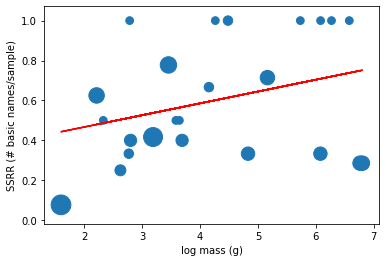

In [99]:
slope, intercept, r_value, p_value, std_err = linregress(np.log(xs), ys)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.scatter(np.log(xs),ys,s=[30*i for i in ns])
plt.plot(np.log(xs),intercept+slope*np.log(xs),'r')
plt.xlabel('log mass (g)')
plt.ylabel('SSRR (# basic names/sample)')

# r_size,p_size = pearsonr(np.log(xs),ys)
# print("pearson r: {0:.2f}".format(r_size)+", pval: {0:.3f}".format(p_size))
# slope, intercept, r_value, p_value, std_err = linregress(np.log(xs), ns)
# print("slope: %f    intercept: %f" % (slope, intercept))
# print("R-squared: %f" % r_value**2)

slope: 0.003228    intercept: 0.576401
R-squared: 0.000115


Text(0, 0.5, 'SSRR (# basic names/sample)')

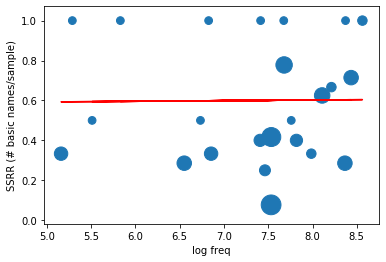

In [100]:
# now do it for frequency of observation in ebird
slope, intercept, r_value, p_value, std_err = linregress(np.log(zs), ys)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.scatter(np.log(zs),ys,s=[30*i for i in ns])
plt.plot(np.log(zs),intercept+slope*np.log(zs),'r')
plt.xlabel('log freq')
plt.ylabel('SSRR (# basic names/sample)')

# r_freq,p_freq = pearsonr(np.log(zs),ys)
# print("pearson r: {0:.2f}".format(r_freq)+", pval: {0:.3f}".format(p_freq))

## Terminal-level taxon units

In [101]:
SSRR_term = {}
ys_term = []
# for sampling_unit in group_members:
for sampling_unit in goodgroups:
    numer_term = len(set(group_members_terminals[sampling_unit]))
    denom = len(group_members[sampling_unit])

    SSRR_term[sampling_unit] = numer_term/denom
    ys_term.append(SSRR_term[sampling_unit])

#     print("log size: {0:.2f}".format(np.log(np.mean(group_members_sizes[sampling_unit])))+", ssrr: {0:.2f}".format(SSRR_term[sampling_unit])+", samp unit: "+sampling_unit+", n: "+str(len(group_members[sampling_unit])))
    print("log freq: {0:.2f}".format(np.log(np.mean(group_members_freqs[sampling_unit])))+", ssrr: {0:.2f}".format(SSRR_term[sampling_unit])+", samp unit: "+sampling_unit+", n: "+str(len(group_members[sampling_unit])))


log freq: 7.53, ssrr: 0.58, samp unit: Tyrant Flycatchers: Pewees, Kingbirds, and Allies, n: 12
log freq: 7.53, ssrr: 0.31, samp unit: Hummingbirds, n: 13
log freq: 5.83, ssrr: 1.00, samp unit: Grouse, Quail, and Allies, n: 2
log freq: 8.11, ssrr: 0.75, samp unit: Wood-Warblers, n: 8
log freq: 7.68, ssrr: 0.78, samp unit: New World Sparrows, n: 9
log freq: 6.73, ssrr: 0.50, samp unit: Tits, Chickadees, and Titmice, n: 2
log freq: 5.51, ssrr: 0.50, samp unit: Swifts, n: 2
log freq: 6.85, ssrr: 0.83, samp unit: Woodpeckers, n: 6
log freq: 8.44, ssrr: 0.86, samp unit: Pigeons and Doves, n: 7
log freq: 6.55, ssrr: 0.43, samp unit: Waterfowl, n: 7
log freq: 8.21, ssrr: 0.67, samp unit: Catbirds, Mockingbirds, and Thrashers, n: 3
log freq: 6.83, ssrr: 1.00, samp unit: Trogons and Quetzals, n: 2
log freq: 7.41, ssrr: 1.00, samp unit: Falcons and Caracaras, n: 2
log freq: 8.37, ssrr: 0.57, samp unit: Vultures, Hawks, and Allies, n: 7
log freq: 7.46, ssrr: 0.25, samp unit: Vireos, n: 4
log freq

In [102]:
group_members_freqs['Tyrant Flycatchers: Pewees, Kingbirds, and Allies']

[2132, 1155, 3019, 2575, 1918, 5119, 1903, 1198, 302, 1776, 967, 393]

In [103]:
np.mean(group_members_freqs['Tyrant Flycatchers: Pewees, Kingbirds, and Allies'])

1871.4166666666667

slope: 0.052686    intercept: 0.495583
R-squared: 0.099359


Text(0, 0.5, 'SSRR (# terminal names/sample)')

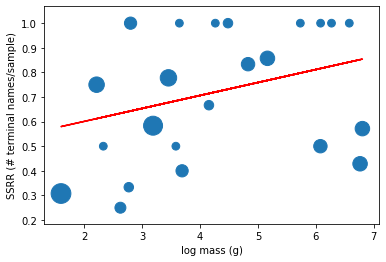

In [104]:
slope, intercept, r_value, p_value, std_err = linregress(np.log(xs), ys_term)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.scatter(np.log(xs),ys_term,s=[30*i for i in ns])
plt.plot(np.log(xs),intercept+slope*np.log(xs),'r')
plt.xlabel('log mass (g)')
plt.ylabel('SSRR (# terminal names/sample)')

# rterm_size,pterm_size = pearsonr(np.log(xs),ys_term)
# print("pearson r: {0:.2f}".format(rterm_size)+", pval: {0:.3f}".format(pterm_size))

slope: 0.025883    intercept: 0.530308
R-squared: 0.009430


Text(0, 0.5, 'SSRR (# terminal names/sample)')

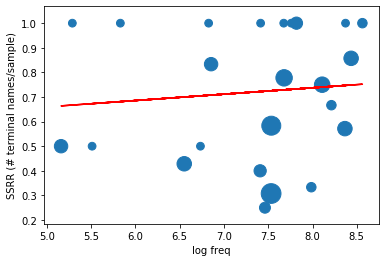

In [105]:
# now do it for frequency of observation in ebird
slope, intercept, r_value, p_value, std_err = linregress(np.log(zs), ys_term)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.scatter(np.log(zs),ys_term,s=[30*i for i in ns])
plt.plot(np.log(zs),intercept+slope*np.log(zs),'r')
plt.xlabel('log freq')
plt.ylabel('SSRR (# terminal names/sample)')

# rterm_freq,pterm_freq = pearsonr(np.log(zs),ys_term)
# print("pearson r: {0:.2f}".format(rterm_freq)+", pval: {0:.3f}".format(pterm_freq))
